In [1]:
import os
import sys 
import pandas as pd
from train_models import train_dl_model, train_transf_chik, LOOK_BACK, PREDICT_N

sys.path.append('../')
from lstm import apply_model

In [2]:
df = pd.read_csv('s_cities.csv', index_col = 'Unnamed: 0')
df = df.loc[df.geocode.isin([3304102,
2112209,
3135050,
2408003,
2806701,
5002951,
2914802,
2900801])]
df

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,ep_ini,ep_end,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik
30,3304102,Porciúncula,2023,7.409684,0.744030,0.302994,2.455592,510.374892,0.592766,0.747429,202302,202316,14,33,RJ,3,2016,2020,2015-10-01,2020-11-01
8,2112209,Timon,2023,9.563497,0.671844,0.300616,2.234891,228.744858,0.552551,0.640182,202302,202319,17,21,MA,1,2022,2022,2021-10-01,2022-11-01
72,3135050,Jaíba,2023,5.000000,0.560484,0.330000,1.698436,3648.209676,0.411223,5.110656,202302,202318,16,31,MG,1,2022,2022,2021-10-01,2022-11-01
9,2408003,Mossoró,2023,14.177189,0.475101,0.301288,1.576898,432.277323,0.365844,1.766998,202302,202330,28,24,RN,4,2016,2020,2015-10-01,2020-11-01
4,2806701,São Cristóvão,2023,20.991219,0.442246,0.302658,1.461207,1028.512378,0.315634,1.279309,202302,202340,38,28,SE,2,2016,2022,2015-10-01,2022-11-01
6,5002951,Chapadão Do Sul,2023,18.690395,0.547123,0.321600,1.701251,186.909182,0.412197,1.153380,202302,202332,30,50,MS,2,2021,2022,2020-10-01,2022-11-01
48,2914802,Itabuna,2023,14.835755,0.480661,0.300000,1.602202,2117.947445,0.375859,1.021300,202302,202331,29,29,BA,2,2016,2022,2015-10-01,2022-11-01
92,2900801,Alcobaça,2023,18.001490,0.472330,0.302483,1.561512,320.797674,0.359595,2.195238,202302,202335,33,29,BA,1,2020,2020,2019-10-01,2020-11-01


Training 3304102 model
Compilation Time :  0.0029001235961914062
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 87)]          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 16)           13312     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112   

2024-01-08 09:13:32.823497: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-08 09:13:32.825430: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


412/412 [==============================] - 4s 5ms/step - loss: 0.0176 - accuracy: 0.1650 - mape: 2566253.0000 - mse: 0.0058 - val_loss: 0.0129 - val_accuracy: 0.1449 - val_mape: 4476529.5000 - val_mse: 0.0011
Epoch 2/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - accuracy: 0.1942 - mape: 4908061.0000 - mse: 0.0057 - val_loss: 0.0096 - val_accuracy: 0.3333 - val_mape: 8014170.0000 - val_mse: 0.0011
Epoch 3/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.2694 - mape: 8562119.0000 - mse: 0.0056 - val_loss: 0.0074 - val_accuracy: 0.3043 - val_mape: 5095068.5000 - val_mse: 9.9073e-04
Epoch 4/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0091 - accuracy: 0.2597 - mape: 6867194.0000 - mse: 0.0056 - val_loss: 0.0058 - val_accuracy: 0.3696 - val_mape: 6857873.0000 - val_mse: 9.9910e-04
Epoch 5/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0077 - accuracy: 0.2937 - mape: 8111336.500

Epoch 38/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.3180 - mape: 2615996.2500 - mse: 0.0032 - val_loss: 0.0028 - val_accuracy: 0.3406 - val_mape: 2986864.0000 - val_mse: 0.0017
Epoch 39/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.3131 - mape: 2250125.7500 - mse: 0.0032 - val_loss: 0.0029 - val_accuracy: 0.3261 - val_mape: 2508611.7500 - val_mse: 0.0019
Epoch 40/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.3519 - mape: 2041179.1250 - mse: 0.0028 - val_loss: 0.0023 - val_accuracy: 0.4130 - val_mape: 1655290.8750 - val_mse: 0.0011
Epoch 41/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0036 - accuracy: 0.3398 - mape: 2221085.7500 - mse: 0.0037 - val_loss: 0.0026 - val_accuracy: 0.3623 - val_mape: 729270.7500 - val_mse: 0.0016
Epoch 42/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.2985 - mape: 251

Epoch 75/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0025 - accuracy: 0.3252 - mape: 2397501.2500 - mse: 0.0027 - val_loss: 0.0025 - val_accuracy: 0.3333 - val_mape: 2530341.7500 - val_mse: 0.0020
Epoch 76/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.3447 - mape: 2115778.5000 - mse: 0.0026 - val_loss: 0.0018 - val_accuracy: 0.3188 - val_mape: 2292471.7500 - val_mse: 9.8922e-04
Epoch 77/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0026 - accuracy: 0.3034 - mape: 2311374.0000 - mse: 0.0028 - val_loss: 0.0017 - val_accuracy: 0.3913 - val_mape: 1220258.7500 - val_mse: 8.0304e-04
Epoch 78/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.3471 - mape: 1888960.5000 - mse: 0.0028 - val_loss: 0.0021 - val_accuracy: 0.3478 - val_mape: 1202458.2500 - val_mse: 0.0014
Epoch 79/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0031 - accuracy: 0.2718 - 

Epoch 112/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0025 - accuracy: 0.3204 - mape: 2329907.7500 - mse: 0.0030 - val_loss: 0.0024 - val_accuracy: 0.3333 - val_mape: 1676688.2500 - val_mse: 0.0020
Epoch 113/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.3398 - mape: 1511290.1250 - mse: 0.0027 - val_loss: 0.0020 - val_accuracy: 0.3406 - val_mape: 388113.8438 - val_mse: 0.0014
Epoch 114/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.3301 - mape: 1871416.5000 - mse: 0.0028 - val_loss: 0.0026 - val_accuracy: 0.2246 - val_mape: 4367596.0000 - val_mse: 0.0023
Epoch 115/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0024 - accuracy: 0.3350 - mape: 2088032.0000 - mse: 0.0029 - val_loss: 0.0023 - val_accuracy: 0.3333 - val_mape: 2826753.0000 - val_mse: 0.0017
Epoch 116/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.3519 - mape

Epoch 149/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0021 - accuracy: 0.3568 - mape: 1623037.6250 - mse: 0.0024 - val_loss: 0.0016 - val_accuracy: 0.3623 - val_mape: 1545098.7500 - val_mse: 0.0011
Epoch 150/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.3568 - mape: 1830064.7500 - mse: 0.0021 - val_loss: 0.0023 - val_accuracy: 0.3696 - val_mape: 1398366.0000 - val_mse: 0.0021
Epoch 151/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.3665 - mape: 1700332.3750 - mse: 0.0021 - val_loss: 0.0024 - val_accuracy: 0.3768 - val_mape: 2646244.0000 - val_mse: 0.0021
Epoch 152/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0022 - accuracy: 0.3932 - mape: 1252112.1250 - mse: 0.0027 - val_loss: 0.0016 - val_accuracy: 0.3696 - val_mape: 248082.0000 - val_mse: 0.0010
Epoch 153/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0020 - accuracy: 0.3908 - mape

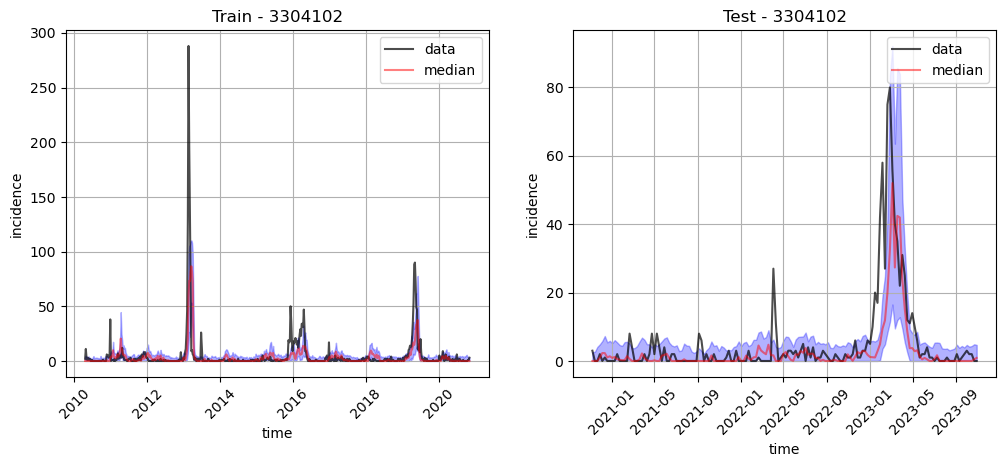

Training 2112209 model
Compilation Time :  0.001728057861328125
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12, 155)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 16)           22016     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112  

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

490/490 [==============================] - 4s 5ms/step - loss: 0.0226 - accuracy: 0.1735 - mape: 9003522.0000 - mse: 0.0065 - val_loss: 0.0192 - val_accuracy: 0.2439 - val_mape: 10234928.0000 - val_mse: 0.0056
Epoch 2/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0170 - accuracy: 0.2673 - mape: 9202526.0000 - mse: 0.0062 - val_loss: 0.0144 - val_accuracy: 0.2317 - val_mape: 7756476.0000 - val_mse: 0.0052
Epoch 3/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0133 - accuracy: 0.2163 - mape: 8006015.0000 - mse: 0.0060 - val_loss: 0.0115 - val_accuracy: 0.3780 - val_mape: 2704972.0000 - val_mse: 0.0051
Epoch 4/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0109 - accuracy: 0.3306 - mape: 6203174.5000 - mse: 0.0057 - val_loss: 0.0097 - val_accuracy: 0.3841 - val_mape: 6869875.5000 - val_mse: 0.0047
Epoch 5/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0097 - accuracy: 0.4041 - mape: 5522793.0000 - mse

490/490 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.4592 - mape: 2836854.0000 - mse: 0.0018 - val_loss: 0.0034 - val_accuracy: 0.4695 - val_mape: 1872262.8750 - val_mse: 0.0015
Epoch 39/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0036 - accuracy: 0.4878 - mape: 2838688.2500 - mse: 0.0021 - val_loss: 0.0033 - val_accuracy: 0.5244 - val_mape: 664224.5625 - val_mse: 0.0014
Epoch 40/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0039 - accuracy: 0.4673 - mape: 3464643.7500 - mse: 0.0026 - val_loss: 0.0036 - val_accuracy: 0.4817 - val_mape: 2158983.7500 - val_mse: 0.0020
Epoch 41/250
490/490 [==============================] - 3s 6ms/step - loss: 0.0036 - accuracy: 0.4327 - mape: 2847258.0000 - mse: 0.0019 - val_loss: 0.0037 - val_accuracy: 0.4512 - val_mape: 3608204.5000 - val_mse: 0.0023
Epoch 42/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.4204 - mape: 3154063.7500 - m

Epoch 75/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.5224 - mape: 2480692.0000 - mse: 0.0016 - val_loss: 0.0026 - val_accuracy: 0.5244 - val_mape: 2456033.7500 - val_mse: 0.0017
Epoch 76/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0030 - accuracy: 0.5000 - mape: 2887148.2500 - mse: 0.0024 - val_loss: 0.0029 - val_accuracy: 0.5000 - val_mape: 2592449.5000 - val_mse: 0.0022
Epoch 77/250
490/490 [==============================] - 3s 6ms/step - loss: 0.0028 - accuracy: 0.4755 - mape: 2938540.5000 - mse: 0.0021 - val_loss: 0.0024 - val_accuracy: 0.4634 - val_mape: 2772437.5000 - val_mse: 0.0013
Epoch 78/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.4796 - mape: 3285212.5000 - mse: 0.0017 - val_loss: 0.0025 - val_accuracy: 0.4756 - val_mape: 1764321.7500 - val_mse: 0.0014
Epoch 79/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.4612 - mape: 27

Epoch 112/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.4959 - mape: 2261200.7500 - mse: 0.0016 - val_loss: 0.0023 - val_accuracy: 0.5000 - val_mape: 2961499.0000 - val_mse: 0.0016
Epoch 113/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0025 - accuracy: 0.5184 - mape: 2907915.5000 - mse: 0.0018 - val_loss: 0.0023 - val_accuracy: 0.4939 - val_mape: 3704088.2500 - val_mse: 0.0014
Epoch 114/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.4755 - mape: 2523923.0000 - mse: 0.0023 - val_loss: 0.0021 - val_accuracy: 0.5000 - val_mape: 1020412.8750 - val_mse: 0.0012
Epoch 115/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0022 - accuracy: 0.4918 - mape: 2184691.2500 - mse: 0.0015 - val_loss: 0.0023 - val_accuracy: 0.5122 - val_mape: 406376.9062 - val_mse: 0.0014
Epoch 116/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 0.4980 - mape

Epoch 149/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.5306 - mape: 1478458.0000 - mse: 0.0020 - val_loss: 0.0018 - val_accuracy: 0.4695 - val_mape: 3597854.5000 - val_mse: 8.7932e-04
Epoch 150/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.5061 - mape: 2631356.5000 - mse: 0.0013 - val_loss: 0.0020 - val_accuracy: 0.5183 - val_mape: 2718171.0000 - val_mse: 0.0016
Epoch 151/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.4694 - mape: 2317963.2500 - mse: 0.0012 - val_loss: 0.0019 - val_accuracy: 0.5366 - val_mape: 2486406.2500 - val_mse: 0.0012
Epoch 152/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 0.5041 - mape: 2367907.7500 - mse: 0.0014 - val_loss: 0.0020 - val_accuracy: 0.4878 - val_mape: 6089404.5000 - val_mse: 0.0012
Epoch 153/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0021 - accuracy: 0.4918 -

Epoch 186/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0018 - accuracy: 0.5041 - mape: 1774021.5000 - mse: 0.0014 - val_loss: 0.0016 - val_accuracy: 0.5183 - val_mape: 2072520.7500 - val_mse: 0.0011
Epoch 187/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 0.5082 - mape: 2284719.2500 - mse: 0.0018 - val_loss: 0.0020 - val_accuracy: 0.4939 - val_mape: 1723284.8750 - val_mse: 0.0018
Epoch 188/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.5122 - mape: 2313446.7500 - mse: 0.0017 - val_loss: 0.0020 - val_accuracy: 0.5183 - val_mape: 3656134.2500 - val_mse: 0.0017
Epoch 189/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.5061 - mape: 2207207.0000 - mse: 0.0015 - val_loss: 0.0017 - val_accuracy: 0.5183 - val_mape: 1030158.0625 - val_mse: 0.0011
Epoch 190/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 0.5245 - map

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

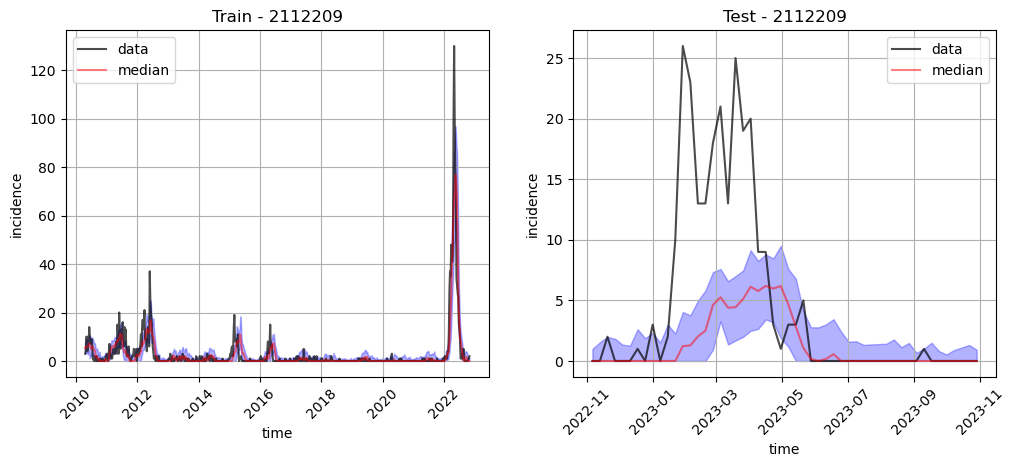

Training 3135050 model
Compilation Time :  0.0017228126525878906
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12, 19)]          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 16)           4608      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112 

Epoch 31/250
490/490 [==============================] - 3s 5ms/step - loss: 0.0018 - accuracy: 0.4265 - mape: 1484821.0000 - mse: 0.0022 - val_loss: 0.0020 - val_accuracy: 0.3598 - val_mape: 646546.3750 - val_mse: 0.0026
Epoch 32/250
490/490 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.3408 - mape: 1638606.7500 - mse: 0.0025 - val_loss: 0.0018 - val_accuracy: 0.3110 - val_mape: 1374753.1250 - val_mse: 0.0023
Epoch 33/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0017 - accuracy: 0.3510 - mape: 1163422.7500 - mse: 0.0022 - val_loss: 0.0019 - val_accuracy: 0.3415 - val_mape: 529916.1250 - val_mse: 0.0025
Epoch 34/250
490/490 [==============================] - 2s 3ms/step - loss: 0.0018 - accuracy: 0.3286 - mape: 1326941.7500 - mse: 0.0023 - val_loss: 0.0021 - val_accuracy: 0.1463 - val_mape: 2949649.2500 - val_mse: 0.0028
Epoch 35/250
490/490 [==============================] - 2s 3ms/step - loss: 0.0018 - accuracy: 0.3102 - mape: 1868

Epoch 68/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0017 - accuracy: 0.2898 - mape: 2754668.5000 - mse: 0.0022 - val_loss: 0.0019 - val_accuracy: 0.1829 - val_mape: 2215188.0000 - val_mse: 0.0027
Epoch 69/250
490/490 [==============================] - 2s 5ms/step - loss: 0.0017 - accuracy: 0.2796 - mape: 2670182.7500 - mse: 0.0023 - val_loss: 0.0019 - val_accuracy: 0.2195 - val_mape: 4630932.5000 - val_mse: 0.0025
Epoch 70/250
490/490 [==============================] - 2s 5ms/step - loss: 0.0016 - accuracy: 0.3510 - mape: 2344725.7500 - mse: 0.0021 - val_loss: 0.0018 - val_accuracy: 0.2500 - val_mape: 1716925.1250 - val_mse: 0.0025
Epoch 71/250
490/490 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 0.2082 - mape: 2576284.5000 - mse: 0.0023 - val_loss: 0.0019 - val_accuracy: 0.2256 - val_mape: 2539219.2500 - val_mse: 0.0027
Epoch 72/250
490/490 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.2918 - mape: 21

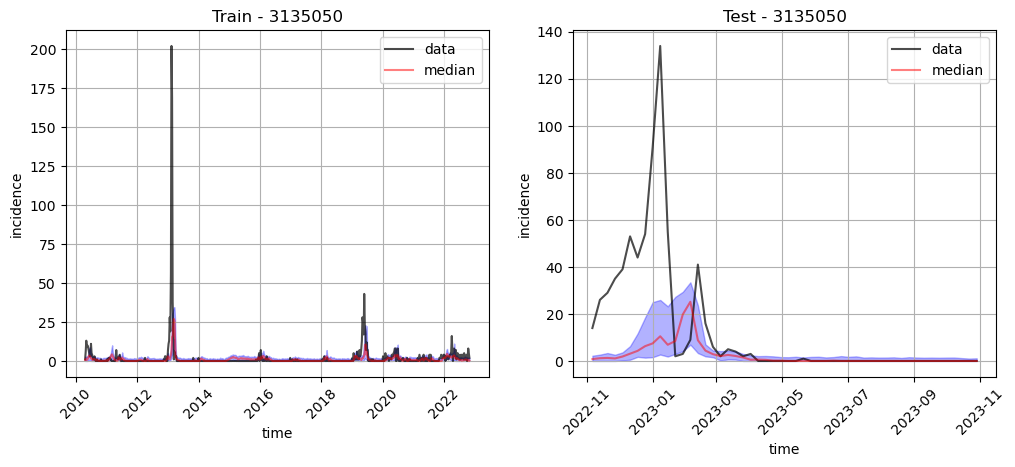

Training 2408003 model
Compilation Time :  0.0015521049499511719
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12, 155)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 16)           22016     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112 

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

412/412 [==============================] - 4s 5ms/step - loss: 0.0334 - accuracy: 0.3010 - mape: 141246.5156 - mse: 0.0213 - val_loss: 0.0239 - val_accuracy: 0.3623 - val_mape: 1243608.3750 - val_mse: 0.0092
Epoch 2/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0258 - accuracy: 0.2743 - mape: 298610.7500 - mse: 0.0171 - val_loss: 0.0201 - val_accuracy: 0.2391 - val_mape: 1443362.3750 - val_mse: 0.0091
Epoch 3/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0224 - accuracy: 0.2379 - mape: 333301.2188 - mse: 0.0167 - val_loss: 0.0179 - val_accuracy: 0.2029 - val_mape: 1594673.2500 - val_mse: 0.0090
Epoch 4/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0196 - accuracy: 0.2403 - mape: 209275.6562 - mse: 0.0152 - val_loss: 0.0145 - val_accuracy: 0.2319 - val_mape: 1319046.8750 - val_mse: 0.0063
Epoch 5/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.2500 - mape: 173677.2188 - mse: 0.01

412/412 [==============================] - 1s 4ms/step - loss: 0.0078 - accuracy: 0.2476 - mape: 130041.5703 - mse: 0.0065 - val_loss: 0.0064 - val_accuracy: 0.2246 - val_mape: 528747.0625 - val_mse: 0.0034
Epoch 39/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0074 - accuracy: 0.2670 - mape: 184078.5781 - mse: 0.0061 - val_loss: 0.0067 - val_accuracy: 0.2609 - val_mape: 390373.9062 - val_mse: 0.0039
Epoch 40/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0075 - accuracy: 0.2743 - mape: 102347.0469 - mse: 0.0061 - val_loss: 0.0064 - val_accuracy: 0.2464 - val_mape: 623238.5000 - val_mse: 0.0035
Epoch 41/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0072 - accuracy: 0.2791 - mape: 145906.4688 - mse: 0.0057 - val_loss: 0.0062 - val_accuracy: 0.2681 - val_mape: 495829.6250 - val_mse: 0.0033
Epoch 42/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0073 - accuracy: 0.2597 - mape: 140375.5625 - mse: 0.00

412/412 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 0.3010 - mape: 109993.4453 - mse: 0.0049 - val_loss: 0.0050 - val_accuracy: 0.3551 - val_mape: 607147.7500 - val_mse: 0.0032
Epoch 76/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.3083 - mape: 151131.2656 - mse: 0.0057 - val_loss: 0.0050 - val_accuracy: 0.3333 - val_mape: 473654.8125 - val_mse: 0.0033
Epoch 77/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.3204 - mape: 114935.8125 - mse: 0.0046 - val_loss: 0.0054 - val_accuracy: 0.3188 - val_mape: 924794.8125 - val_mse: 0.0039
Epoch 78/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0058 - accuracy: 0.3325 - mape: 106983.6250 - mse: 0.0055 - val_loss: 0.0050 - val_accuracy: 0.3696 - val_mape: 495607.0625 - val_mse: 0.0033
Epoch 79/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0059 - accuracy: 0.3058 - mape: 108751.8906 - mse: 0.00

412/412 [==============================] - 1s 4ms/step - loss: 0.0051 - accuracy: 0.3180 - mape: 121910.2266 - mse: 0.0050 - val_loss: 0.0044 - val_accuracy: 0.3986 - val_mape: 484116.3750 - val_mse: 0.0034
Epoch 113/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0049 - accuracy: 0.3180 - mape: 179196.6562 - mse: 0.0048 - val_loss: 0.0043 - val_accuracy: 0.3623 - val_mape: 674624.8750 - val_mse: 0.0031
Epoch 114/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0049 - accuracy: 0.3180 - mape: 135913.8906 - mse: 0.0048 - val_loss: 0.0043 - val_accuracy: 0.3551 - val_mape: 328007.4062 - val_mse: 0.0031
Epoch 115/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0050 - accuracy: 0.3034 - mape: 102648.6250 - mse: 0.0049 - val_loss: 0.0043 - val_accuracy: 0.3768 - val_mape: 594068.2500 - val_mse: 0.0032
Epoch 116/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.3398 - mape: 190480.1875 - mse: 

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

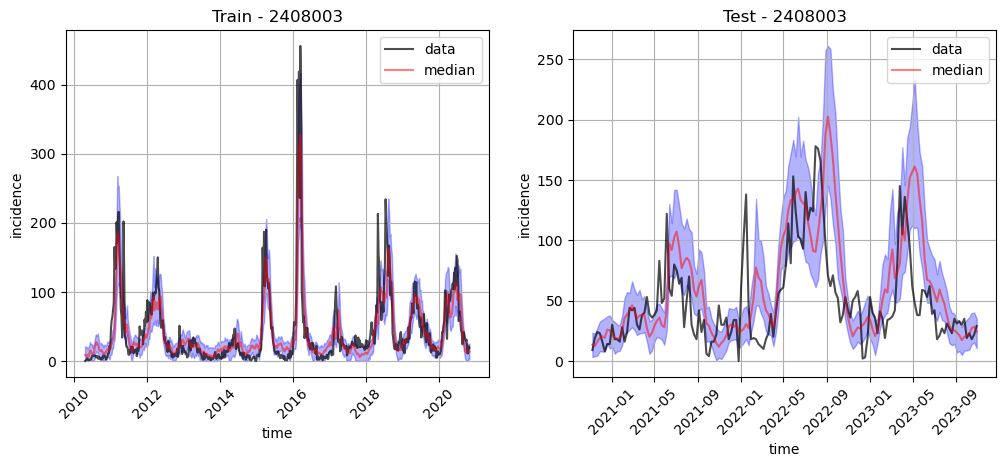

Training 2806701 model
Compilation Time :  0.0017571449279785156
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 12, 172)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 16)           24192     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112 

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

490/490 [==============================] - 4s 5ms/step - loss: 0.0307 - accuracy: 0.2184 - mape: 13662189.0000 - mse: 0.0165 - val_loss: 0.0283 - val_accuracy: 0.2561 - val_mape: 24687364.0000 - val_mse: 0.0177
Epoch 2/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.2918 - mape: 24523718.0000 - mse: 0.0154 - val_loss: 0.0237 - val_accuracy: 0.3110 - val_mape: 30566822.0000 - val_mse: 0.0172
Epoch 3/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0208 - accuracy: 0.2429 - mape: 25316756.0000 - mse: 0.0152 - val_loss: 0.0205 - val_accuracy: 0.2256 - val_mape: 19050458.0000 - val_mse: 0.0171
Epoch 4/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.2510 - mape: 21599528.0000 - mse: 0.0147 - val_loss: 0.0178 - val_accuracy: 0.2439 - val_mape: 25813228.0000 - val_mse: 0.0152
Epoch 5/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0154 - accuracy: 0.2061 - mape: 16218675.00

Epoch 38/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0066 - accuracy: 0.3367 - mape: 6360787.0000 - mse: 0.0053 - val_loss: 0.0063 - val_accuracy: 0.3902 - val_mape: 4256778.0000 - val_mse: 0.0051
Epoch 39/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.3531 - mape: 6112041.5000 - mse: 0.0049 - val_loss: 0.0064 - val_accuracy: 0.4146 - val_mape: 3586112.7500 - val_mse: 0.0052
Epoch 40/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.3327 - mape: 6608888.0000 - mse: 0.0049 - val_loss: 0.0061 - val_accuracy: 0.2988 - val_mape: 10563357.0000 - val_mse: 0.0046
Epoch 41/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.3592 - mape: 6542276.5000 - mse: 0.0051 - val_loss: 0.0065 - val_accuracy: 0.3232 - val_mape: 10614504.0000 - val_mse: 0.0057
Epoch 42/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.3694 - mape: 

Epoch 75/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.3939 - mape: 5549627.5000 - mse: 0.0042 - val_loss: 0.0060 - val_accuracy: 0.1890 - val_mape: 18846594.0000 - val_mse: 0.0054
Epoch 76/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.3714 - mape: 6366632.0000 - mse: 0.0043 - val_loss: 0.0051 - val_accuracy: 0.3902 - val_mape: 3463255.7500 - val_mse: 0.0049
Epoch 77/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0051 - accuracy: 0.3837 - mape: 5842795.0000 - mse: 0.0047 - val_loss: 0.0049 - val_accuracy: 0.4085 - val_mape: 3695858.2500 - val_mse: 0.0045
Epoch 78/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.3571 - mape: 6391474.5000 - mse: 0.0044 - val_loss: 0.0046 - val_accuracy: 0.3841 - val_mape: 4879065.0000 - val_mse: 0.0041
Epoch 79/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.3469 - mape: 5

Epoch 112/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.3694 - mape: 5716357.5000 - mse: 0.0042 - val_loss: 0.0048 - val_accuracy: 0.3537 - val_mape: 6973019.5000 - val_mse: 0.0050
Epoch 113/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.3469 - mape: 6878379.0000 - mse: 0.0042 - val_loss: 0.0046 - val_accuracy: 0.3963 - val_mape: 2890831.0000 - val_mse: 0.0046
Epoch 114/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.3265 - mape: 5917628.0000 - mse: 0.0042 - val_loss: 0.0047 - val_accuracy: 0.3171 - val_mape: 10491186.0000 - val_mse: 0.0046
Epoch 115/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0043 - accuracy: 0.4347 - mape: 6241723.0000 - mse: 0.0040 - val_loss: 0.0041 - val_accuracy: 0.3598 - val_mape: 8238635.5000 - val_mse: 0.0036
Epoch 116/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0043 - accuracy: 0.3837 - ma

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

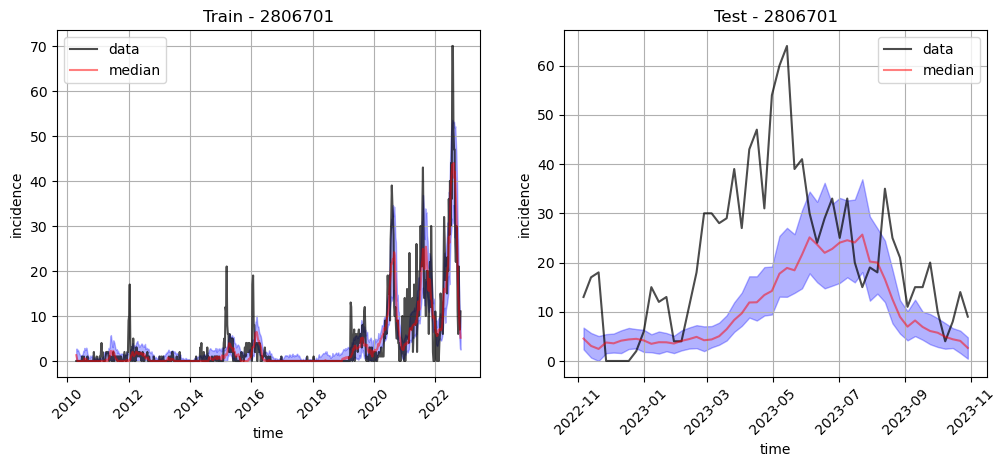

Training 5002951 model
Compilation Time :  0.001744985580444336
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 12, 189)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 16)           26368     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112  

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

490/490 [==============================] - 5s 5ms/step - loss: 0.0263 - accuracy: 0.2469 - mape: 4272180.0000 - mse: 0.0102 - val_loss: 0.0201 - val_accuracy: 0.2378 - val_mape: 10118119.0000 - val_mse: 0.0065
Epoch 2/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0190 - accuracy: 0.2306 - mape: 6996829.5000 - mse: 0.0091 - val_loss: 0.0149 - val_accuracy: 0.2683 - val_mape: 2268511.7500 - val_mse: 0.0058
Epoch 3/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0147 - accuracy: 0.2551 - mape: 3324767.7500 - mse: 0.0080 - val_loss: 0.0123 - val_accuracy: 0.2195 - val_mape: 6360331.5000 - val_mse: 0.0053
Epoch 4/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0123 - accuracy: 0.2612 - mape: 2291021.0000 - mse: 0.0070 - val_loss: 0.0110 - val_accuracy: 0.3049 - val_mape: 426664.5000 - val_mse: 0.0053
Epoch 5/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0112 - accuracy: 0.3020 - mape: 1422386.2500 - mse:

490/490 [==============================] - 2s 4ms/step - loss: 0.0051 - accuracy: 0.2796 - mape: 1273016.0000 - mse: 0.0040 - val_loss: 0.0044 - val_accuracy: 0.2195 - val_mape: 1856278.6250 - val_mse: 0.0027
Epoch 39/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0051 - accuracy: 0.2735 - mape: 1956585.5000 - mse: 0.0040 - val_loss: 0.0044 - val_accuracy: 0.3598 - val_mape: 1059567.7500 - val_mse: 0.0027
Epoch 40/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0048 - accuracy: 0.2837 - mape: 1323335.8750 - mse: 0.0037 - val_loss: 0.0043 - val_accuracy: 0.2866 - val_mape: 1058756.6250 - val_mse: 0.0024
Epoch 41/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.3163 - mape: 1666637.8750 - mse: 0.0039 - val_loss: 0.0041 - val_accuracy: 0.2866 - val_mape: 1236526.1250 - val_mse: 0.0024
Epoch 42/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.3041 - mape: 1060228.7500 - 

Epoch 75/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.3122 - mape: 1537373.2500 - mse: 0.0027 - val_loss: 0.0035 - val_accuracy: 0.3415 - val_mape: 1704539.8750 - val_mse: 0.0026
Epoch 76/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0035 - accuracy: 0.3306 - mape: 1338139.5000 - mse: 0.0029 - val_loss: 0.0033 - val_accuracy: 0.3232 - val_mape: 1765816.6250 - val_mse: 0.0023
Epoch 77/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0034 - accuracy: 0.3347 - mape: 1575639.1250 - mse: 0.0027 - val_loss: 0.0036 - val_accuracy: 0.3415 - val_mape: 758686.8125 - val_mse: 0.0026
Epoch 78/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.3327 - mape: 1296364.8750 - mse: 0.0034 - val_loss: 0.0037 - val_accuracy: 0.2073 - val_mape: 4250341.5000 - val_mse: 0.0027
Epoch 79/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0034 - accuracy: 0.3000 - mape: 133

Epoch 112/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0032 - accuracy: 0.3265 - mape: 1567419.3750 - mse: 0.0029 - val_loss: 0.0030 - val_accuracy: 0.3354 - val_mape: 1258032.5000 - val_mse: 0.0023
Epoch 113/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0029 - accuracy: 0.3265 - mape: 1227842.7500 - mse: 0.0025 - val_loss: 0.0031 - val_accuracy: 0.3171 - val_mape: 2959723.2500 - val_mse: 0.0024
Epoch 114/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0032 - accuracy: 0.3531 - mape: 1122703.1250 - mse: 0.0029 - val_loss: 0.0030 - val_accuracy: 0.3415 - val_mape: 1210034.8750 - val_mse: 0.0023
Epoch 115/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.3612 - mape: 1022597.2500 - mse: 0.0019 - val_loss: 0.0030 - val_accuracy: 0.3293 - val_mape: 1247759.5000 - val_mse: 0.0024
Epoch 116/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0032 - accuracy: 0.3286 - map

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

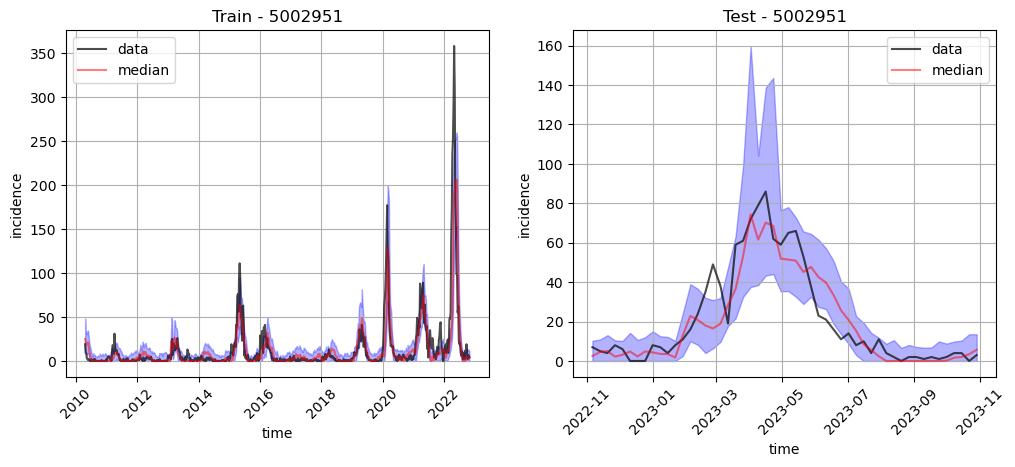

Training 2914802 model
Compilation Time :  0.0017008781433105469
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 12, 121)]         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 16)           17664     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112 

/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

490/490 [==============================] - 4s 5ms/step - loss: 0.0207 - accuracy: 0.2347 - mape: 382378.0000 - mse: 0.0065 - val_loss: 0.0185 - val_accuracy: 0.2500 - val_mape: 331423.8750 - val_mse: 0.0078
Epoch 2/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0158 - accuracy: 0.2510 - mape: 422974.2188 - mse: 0.0064 - val_loss: 0.0146 - val_accuracy: 0.2683 - val_mape: 297046.6250 - val_mse: 0.0079
Epoch 3/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0125 - accuracy: 0.2673 - mape: 415575.0625 - mse: 0.0064 - val_loss: 0.0117 - val_accuracy: 0.2866 - val_mape: 302361.6250 - val_mse: 0.0076
Epoch 4/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0103 - accuracy: 0.2673 - mape: 404816.8125 - mse: 0.0063 - val_loss: 0.0101 - val_accuracy: 0.2622 - val_mape: 252372.4688 - val_mse: 0.0077
Epoch 5/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0089 - accuracy: 0.2469 - mape: 403447.2812 - mse: 0.0061 -

Epoch 39/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0031 - accuracy: 0.3143 - mape: 46619.0195 - mse: 0.0023 - val_loss: 0.0034 - val_accuracy: 0.2927 - val_mape: 21065.4004 - val_mse: 0.0033
Epoch 40/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0034 - accuracy: 0.3204 - mape: 40928.8750 - mse: 0.0028 - val_loss: 0.0035 - val_accuracy: 0.2500 - val_mape: 110428.3906 - val_mse: 0.0035
Epoch 41/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0031 - accuracy: 0.3224 - mape: 26288.7266 - mse: 0.0024 - val_loss: 0.0034 - val_accuracy: 0.2988 - val_mape: 42706.4375 - val_mse: 0.0032
Epoch 42/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0031 - accuracy: 0.3163 - mape: 24845.2891 - mse: 0.0024 - val_loss: 0.0031 - val_accuracy: 0.3354 - val_mape: 16103.7666 - val_mse: 0.0027
Epoch 43/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0031 - accuracy: 0.3265 - mape: 37438.2422 - mse:

Epoch 77/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.2959 - mape: 81476.8594 - mse: 0.0023 - val_loss: 0.0027 - val_accuracy: 0.2805 - val_mape: 157.8125 - val_mse: 0.0027
Epoch 78/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0024 - accuracy: 0.3245 - mape: 55706.3281 - mse: 0.0019 - val_loss: 0.0026 - val_accuracy: 0.3110 - val_mape: 75461.2656 - val_mse: 0.0024
Epoch 79/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0025 - accuracy: 0.2980 - mape: 50824.1758 - mse: 0.0022 - val_loss: 0.0026 - val_accuracy: 0.3415 - val_mape: 4267.5649 - val_mse: 0.0027
Epoch 80/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0023 - accuracy: 0.3143 - mape: 37047.4258 - mse: 0.0018 - val_loss: 0.0023 - val_accuracy: 0.3171 - val_mape: 116447.6797 - val_mse: 0.0018
Epoch 81/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0026 - accuracy: 0.3327 - mape: 17576.1484 - mse: 0.

490/490 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.2796 - mape: 48218.8594 - mse: 0.0014 - val_loss: 0.0020 - val_accuracy: 0.3354 - val_mape: 142.1091 - val_mse: 0.0017
Epoch 115/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0020 - accuracy: 0.3408 - mape: 19813.1777 - mse: 0.0016 - val_loss: 0.0023 - val_accuracy: 0.2805 - val_mape: 85654.7109 - val_mse: 0.0022
Epoch 116/250
490/490 [==============================] - 2s 4ms/step - loss: 0.0019 - accuracy: 0.3102 - mape: 7139.5010 - mse: 0.0015 - val_loss: 0.0021 - val_accuracy: 0.3720 - val_mape: 32858.2031 - val_mse: 0.0020


/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast/notebooks/../preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/transfer-learning-forecast

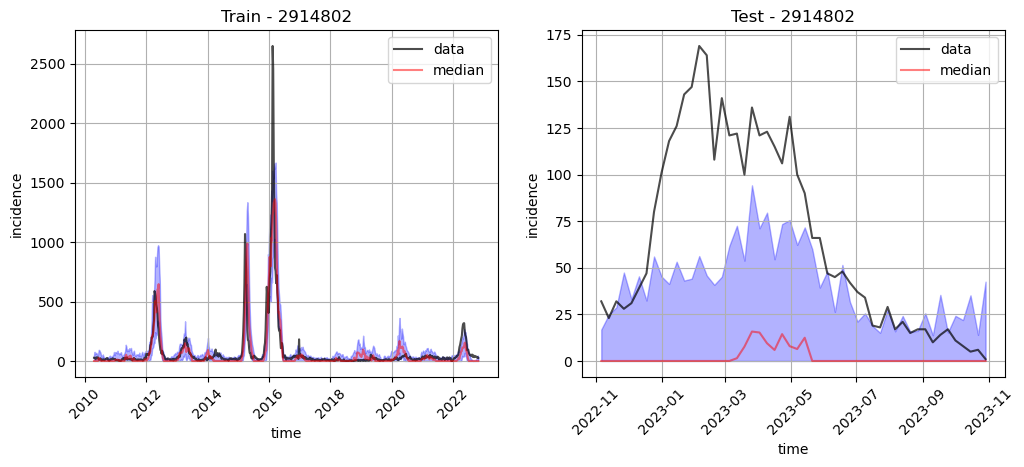

Training 2900801 model
Compilation Time :  0.0017552375793457031
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 12, 70)]          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 16)           11136     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 16)            2112      
                                                                 
 dropout_2 (Dropout)         (None, 12, 16)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                2112 

412/412 [==============================] - 1s 4ms/step - loss: 0.0076 - accuracy: 0.1820 - mape: 11231108.0000 - mse: 0.0076 - val_loss: 0.0088 - val_accuracy: 0.2536 - val_mape: 16203685.0000 - val_mse: 0.0098
Epoch 31/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0077 - accuracy: 0.2476 - mape: 12713414.0000 - mse: 0.0077 - val_loss: 0.0094 - val_accuracy: 0.1812 - val_mape: 11248281.0000 - val_mse: 0.0107
Epoch 32/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0075 - accuracy: 0.2136 - mape: 11761819.0000 - mse: 0.0076 - val_loss: 0.0089 - val_accuracy: 0.1884 - val_mape: 25148480.0000 - val_mse: 0.0096
Epoch 33/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0075 - accuracy: 0.1893 - mape: 12591893.0000 - mse: 0.0076 - val_loss: 0.0086 - val_accuracy: 0.1957 - val_mape: 15206739.0000 - val_mse: 0.0094
Epoch 34/250
412/412 [==============================] - 1s 3ms/step - loss: 0.0077 - accuracy: 0.1990 - mape: 1185988

Epoch 67/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.2015 - mape: 11922367.0000 - mse: 0.0067 - val_loss: 0.0084 - val_accuracy: 0.2246 - val_mape: 16702744.0000 - val_mse: 0.0101
Epoch 68/250
412/412 [==============================] - 1s 4ms/step - loss: 0.0067 - accuracy: 0.1820 - mape: 11858753.0000 - mse: 0.0072 - val_loss: 0.0084 - val_accuracy: 0.1667 - val_mape: 13418208.0000 - val_mse: 0.0102
Epoch 69/250
412/412 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.1748 - mape: 13554345.0000 - mse: 0.0067 - val_loss: 0.0090 - val_accuracy: 0.1739 - val_mape: 16527944.0000 - val_mse: 0.0109


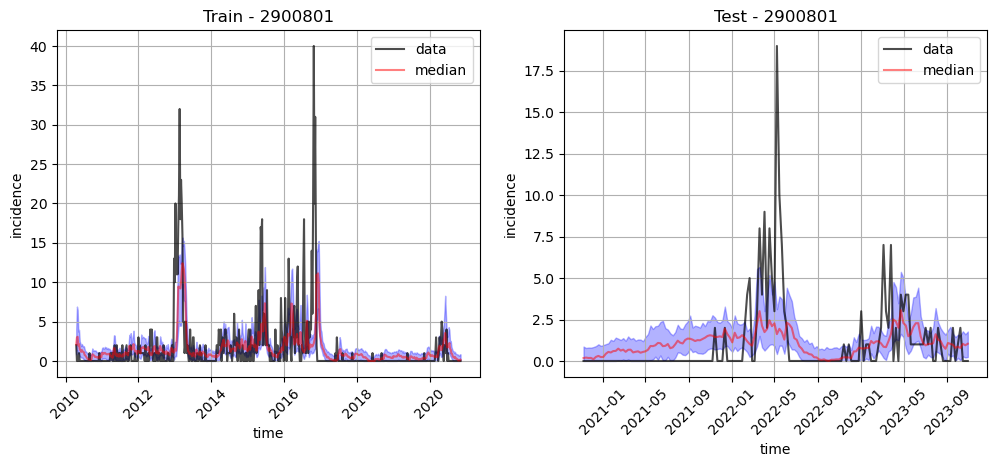

In [3]:
import pandas as pd
from train_models import train_dl_model, train_transf_chik
import os


end_date = '2023-11-01'
RETRAIN = True

for city, ini_date, end_date_train in zip(
    df.geocode, df.start_train_chik, df.end_train_chik):
    print(f"Training {city} model")

    # train the dengue model
    if RETRAIN or not os.path.exists(f'../saved_models/lstm/trained_{city}_dengue_msle.keras'):
        train_dl_model(city,   doenca = 'dengue', end_date_train = end_date_train , end_date = end_date, plot = False)
    
    metrics = apply_model(city, ini_date = None, 
                    end_date = end_date, look_back = LOOK_BACK, end_train_date =  end_date_train, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/dengue_{city}_cluster.csv', plot = True)
        